In [ ]:
import os
import cv2  # For loading and processing images
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # To convert labels to numbers
from tensorflow.keras.utils import to_categorical  # For one-hot encoding

In [ ]:
def load_images_from_folder(folder_path, image_size=(48, 48), grayscale=True):
    images = []  # List to store image arrays
    labels = []  # List to store image labels

    # Loop over each emotion folder (happy, sad, etc.)
    for class_label in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_label)

        # Ensure the path is a directory
        if not os.path.isdir(class_path):
            continue

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Read image (grayscale or color)
            if grayscale:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale image
            else:
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # RGB image

            if img is not None:
                # Resize the image to 48x48 (or any desired size)
                img_resized = cv2.resize(img, image_size)

                images.append(img_resized)
                labels.append(class_label)  # Label is the folder name (happy, sad, etc.)

    return np.array(images), np.array(labels)

# Call the function to load the images
X, y = load_images_from_folder('/content/drive/MyDrive/dataset', image_size=(48, 48))
print(f"Loaded {len(X)} images with labels {len(y)}")

Loaded 212 images with labels 212


In [ ]:
# Normalize pixel values to 0-1
X = X / 255.0  # Normalize
X = X.astype('float32')  # Convert to float32

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Example: 'happy' -> 0, 'sad' -> 1, 'angry' -> 2

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_categorical = to_categorical(y_encoded)  # Converts to a binary matrix

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
!pip install tensorflow

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


def create_cnn(input_shape=(48, 48, 1), num_classes=3):
    """
    CNN for emotion recognition.
    input_shape: (height, width, channels) for each image.
    num_classes: Number of emotion classes (e.g., happy, sad, angry, etc.)
    """
    # Sequential model is imported from tensorflow.keras.models
    model = Sequential()

    # 1. Convolutional Layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # 2. Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Number of output classes

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn_model = create_cnn()
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,331 (1.36 MB)

 Trainable params: 355,331 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.3981 - loss: 1.1133 - val_accuracy: 0.3235 - val_loss: 1.1011
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3500 - loss: 1.0981 - val_accuracy: 0.3235 - val_loss: 1.0995
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3980 - loss: 1.0957 - val_accuracy: 0.3235 - val_loss: 1.0977
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3883 - loss: 1.0951 - val_accuracy: 0.3235 - val_loss: 1.0954
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3832 - loss: 1.0887 - val_accuracy: 0.3235 - val_loss: 1.0936
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4462 - loss: 1.0886 - val_accuracy: 0.3235 - val_loss: 1.0909
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4160 - loss: 1.0815 - val_accuracy: 0.3235 - val_loss: 1.0893
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4055 - loss: 1.0785 - val_accuracy: 0.3235 - val_l

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4973 - loss: 5.2087
Test Accuracy: 51.16%


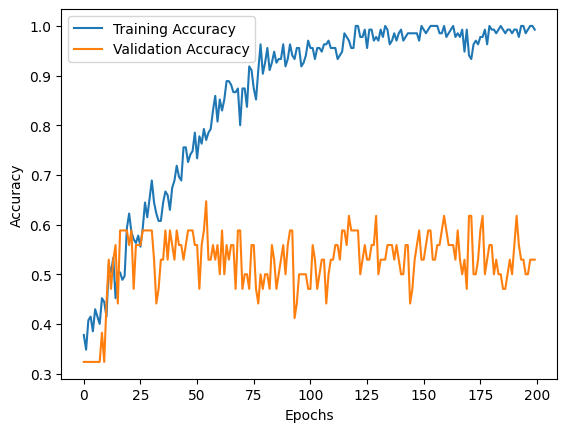

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_emotion(model, image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (48, 48)) / 255.0  # Normalize the image
    img_reshaped = img_resized.reshape(1, 48, 48, 1)  # Reshape for CNN input
    prediction = model.predict(img_reshaped)
    emotion = label_encoder.inverse_transform([np.argmax(prediction)])
    return emotion[0]

# Test on a new image
emotion = predict_emotion(cnn_model, '/content/drive/MyDrive/PROJECT/child2.jpg')
print(f'Predicted Emotion: {emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Emotion: Happy


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
import os
import cv2

# Create the folder if it doesn't exist
output_folder = 'preprocessed_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save each preprocessed image in this folder
for i in range(len(X)):
    image_path = os.path.join(output_folder, f'image_{i}.jpg')
    img = (X[i] * 255).astype('uint8')  # Convert from [0, 1] to [0, 255]
    cv2.imwrite(image_path, img)  # Save image as a .jpg file


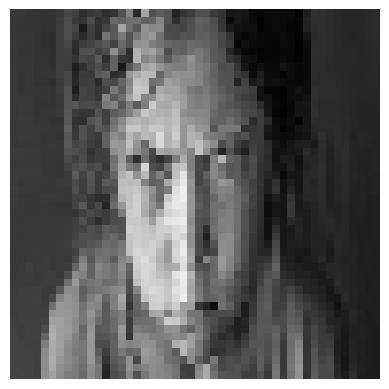

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and display an image
img = cv2.imread('preprocessed_images/image_10.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')
plt.show()


In [ ]:
import os

# List all files in the current directory
files = os.listdir(os.getcwd())
print("Files in the current directory:", files)


Files in the current directory: ['.config', 'drive', 'preprocessed_images', 'sample_data']
